<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 8. <b>Кластеризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Кек" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [3]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green", "magenta", "yellow", "cyan", "black"])

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

<p><b>Задание 1</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T1.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Построить графики X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)</li>
    <li>Произвести кластеризацию методом KMean и построить два графика NInit-ARS для init=Random и init=K-Means++, где
<br><b>NInit</b> - количество повторений выполнения алгоритма кластеризации - от 1 до 40, 
<br><b>ARS</b> (adjusted_rand_score) - ошибка кластеризации, 
<br><b>параметры KMean</b>: n_clusters=5, max_iter=300, init="random", n_init=i</li>
    <li>Повторить шаг 4 несколько раз</li>
    <li>Сделать выводы по полученным результатам</li>
</ol>

In [4]:
# 1. Загрузить исходные данные - файл "Cluster_A8_T1.csv"
df_data = pnd.read_csv("Cluster_A8_T1.csv")
df_data.head()

,X1,X2,X3,Y
0,0.396845,1.463098,-2.529556,1
1,-1.584280,-2.366886,1.562455,4
2,2.164778,2.075564,3.036170,0
3,-0.831406,-3.857093,2.808180,4
4,1.847920,1.817510,-2.712600,1


In [5]:
# Для 3D графика
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

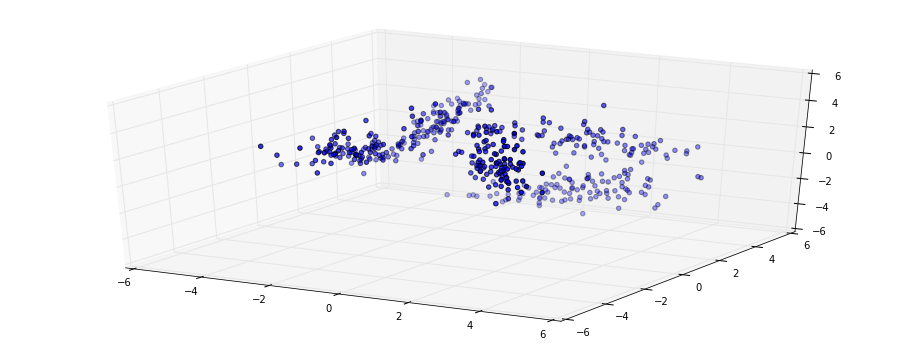

In [6]:
# 3D график (на всякий случай)
fig = plt.figure(1, figsize=[16, 6])
ax = fig.gca(projection='3d')
ax.scatter(df_data.X1, df_data.X2, df_data.X3, cmap=clrMap)

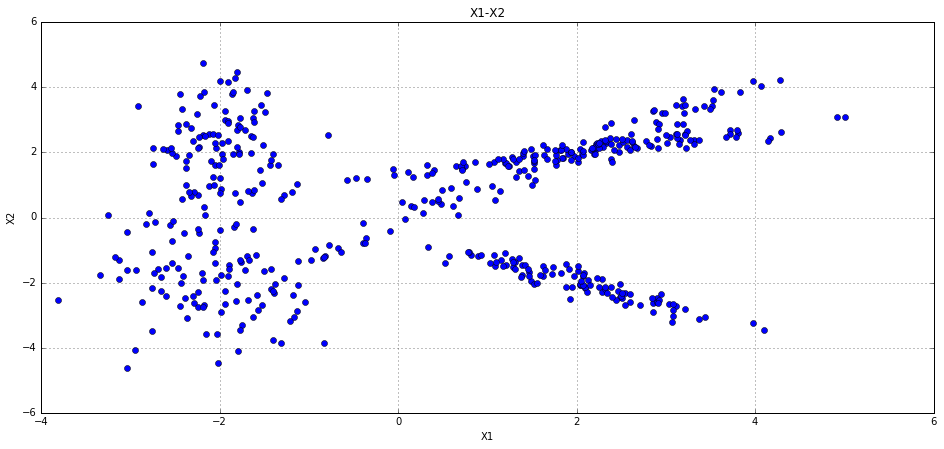

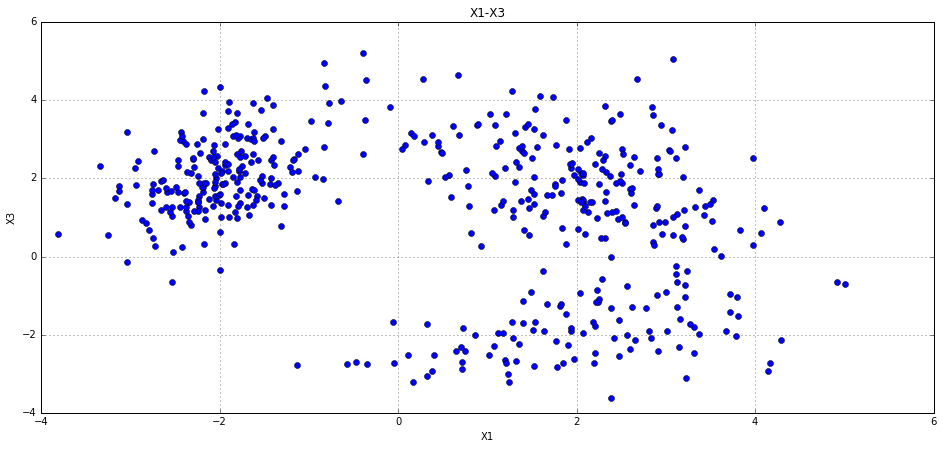

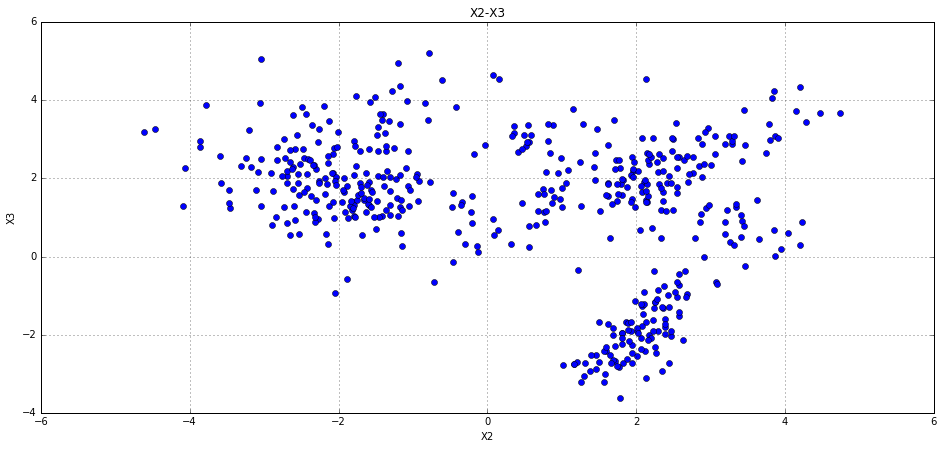

In [7]:
# 2. Построить графики X1-X2, X1-X3, X2-X3
def plot_dots(x_label, y_label, x, y):
    plt.figure(1, figsize=[16, 7])
    plt.title(x_label+'-'+y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, 'o')
    plt.grid(True)
    plt.show()

plot_dots("X1", "X2", df_data.X1, df_data.X2)
plot_dots("X1", "X3", df_data.X1, df_data.X3)
plot_dots("X2", "X3", df_data.X2, df_data.X3)

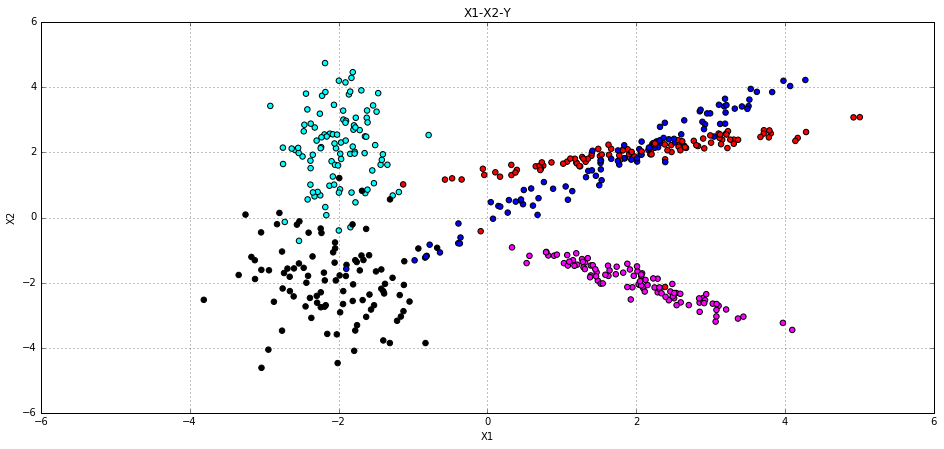

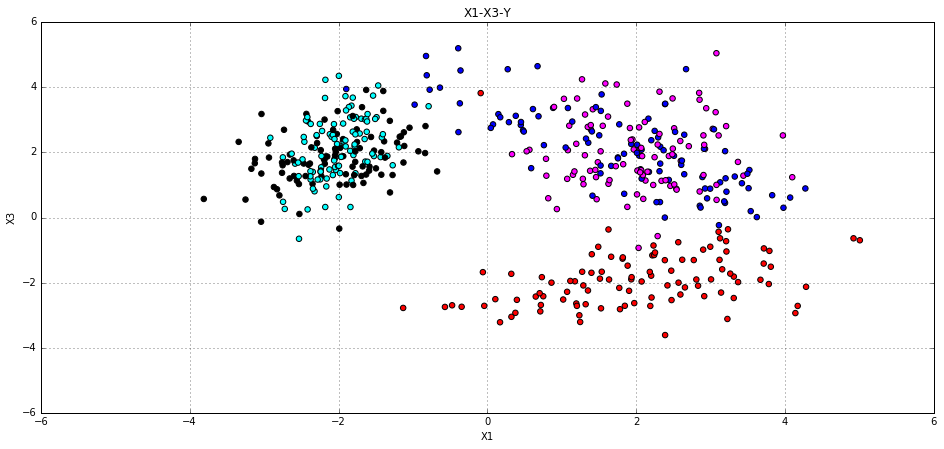

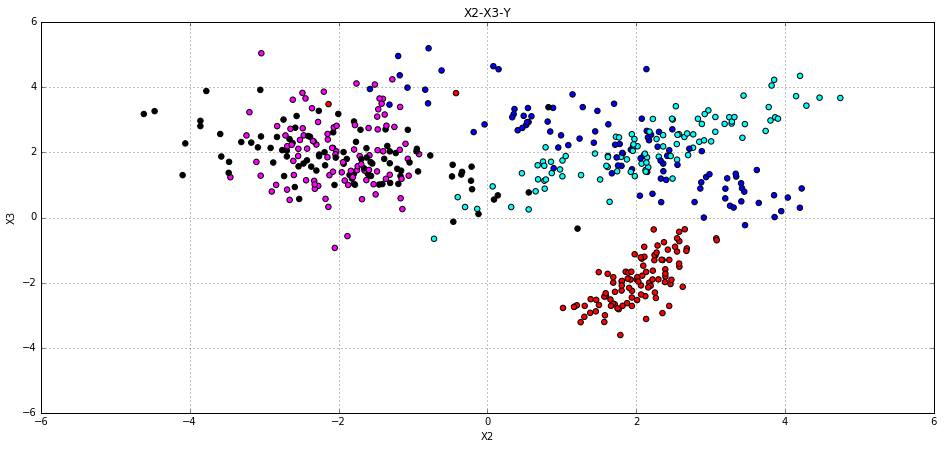

In [8]:
# 3. Построить графики X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - реальные кластеры)
def plot_classes(x_label, y_label, x, y, c):
    plt.figure(1, figsize=[16, 7])
    plt.title(x_label+'-'+y_label+'-Y')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x, y, c=c, s=30, cmap=clrMap)
    plt.grid(True)
    plt.show()

plot_classes("X1", "X2", df_data.X1, df_data.X2, df_data.Y)
plot_classes("X1", "X3", df_data.X1, df_data.X3, df_data.Y)
plot_classes("X2", "X3", df_data.X2, df_data.X3, df_data.Y)

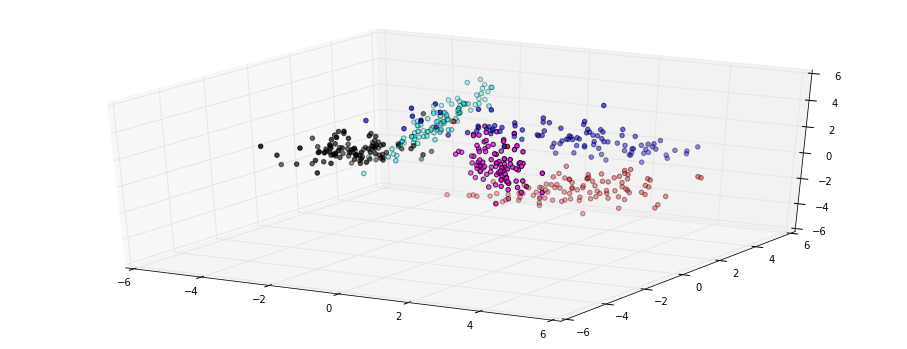

In [9]:
# 3D график с кластерами
fig = plt.figure(1, figsize=[16, 6])
ax = fig.gca(projection='3d')
ax.scatter(df_data.X1, df_data.X2, df_data.X3, c=df_data.Y, cmap=clrMap)

In [10]:
# Подготавливаем исходные данные
x = list(zip(df_data.X1, df_data.X2, df_data.X3))
y = df_data.Y.tolist()

In [11]:
# 4. Произвести кластеризацию методом KMean и построить два графика NInit-ARS для init=Random и init=K-Means++, где 
# NInit - количество повторений выполнения алгоритма кластеризации - от 1 до 40, 
# ARS (adjusted_rand_score) - ошибка кластеризации, 
# параметры KMean: n_clusters=5, max_iter=300, init="random", n_init=i

n_inits = range(1, 41)
ars_random = []
ars_kmeanspp = []

for i in n_inits:
    k_means_rand = KMeans(n_clusters=5, max_iter=300, init="random", n_init=i)
    k_means_rand.fit(x, y)
    ars_random.append(adjusted_rand_score(y, k_means_rand.predict(x)))
    
    k_means_pp = KMeans(n_clusters=5, max_iter=300, n_init=i, init="k-means++")
    k_means_pp.fit(x, y)
    ars_kmeanspp.append(adjusted_rand_score(y, k_means_pp.predict(x)))

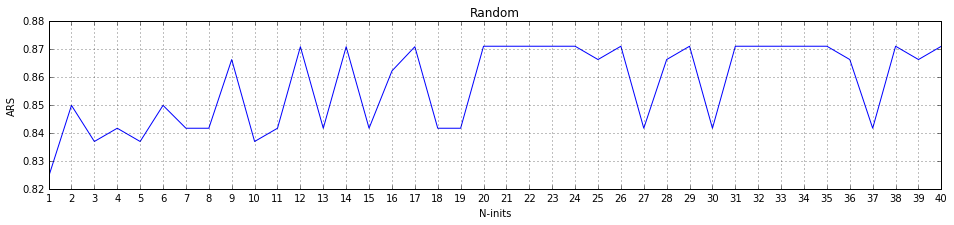

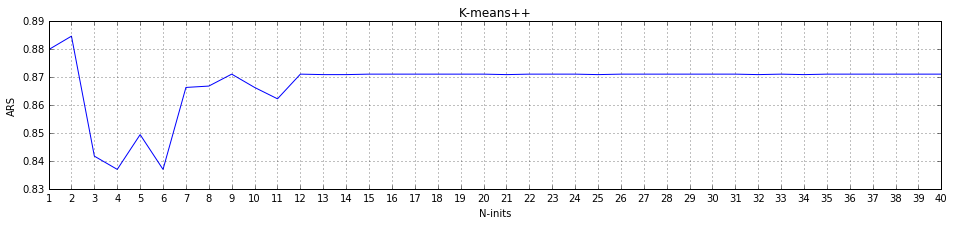

In [12]:
def plot_ars(title, ars):
    plt.figure(1, figsize=[16, 3])
    plt.title(title)
    plt.xlabel("N-inits")
    plt.xticks(n_inits)
    plt.ylabel("ARS")
    plt.plot(n_inits, ars)
    plt.grid(True)
    plt.show()
    
plot_ars("Random", ars_random)
plot_ars("K-means++", ars_kmeanspp)

In [13]:
# 5. Повторить шаг 4 несколько раз
# 6. Сделать выводы по полученным результатам

<div>Можно сформировать следующие выводы:
<ul>
<li>Для обоих методов инициализации результаты ARS сравнительно похожи;</li>
<li>Метод инициализации Random зачастую ведет к более высокому ARS;</li>
<li>Оптимальное значение n_init лежит в пределах от 1 до 5, причем значения 2 и 3 наиболее часто имеют максимальную ARS;</li>
<li>При изменении n_inits и использовании метода инициализации Random возможны большие скачки ARS, K-means++ более стабилен.</li>
</ul>
</div>

<p><b>Задание 2</b></p>

<ol>
    <li>Загрузить исходные данные - файл <b>"Cluster_A8_T2.csv"</b></li>
    <li>Построить графики X1-X2, X1-X3, X2-X3</li>
    <li>Произвести кластеризацию методом KMean и построить график NCluster-Inertia, где
<br><b>NCluster</b> - количество кластеров,
<br><b>Inertia</b> - сумма расстояний наблюдений до их ближайших центров кластеров,
<br><b>Параметры</b> KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20</li>
    <li>Выбрать подходящее количество кластеров</li>
    <li>Построить граифики X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - предсказанные кластеры)</li>
</ol>

In [14]:
# 1. Загрузить исходные данные - файл "Cluster_A8_T2.csv"
df_data = pnd.read_csv("Cluster_A8_T2.csv")
df_data.head()

,X1,X2,X3
0,-3.208327,1.387375,4.072033
1,3.140555,3.144011,-1.053300
2,-1.263527,-1.061774,-3.744767
3,2.936125,1.577823,1.252174
4,-1.467342,-2.380948,2.174253


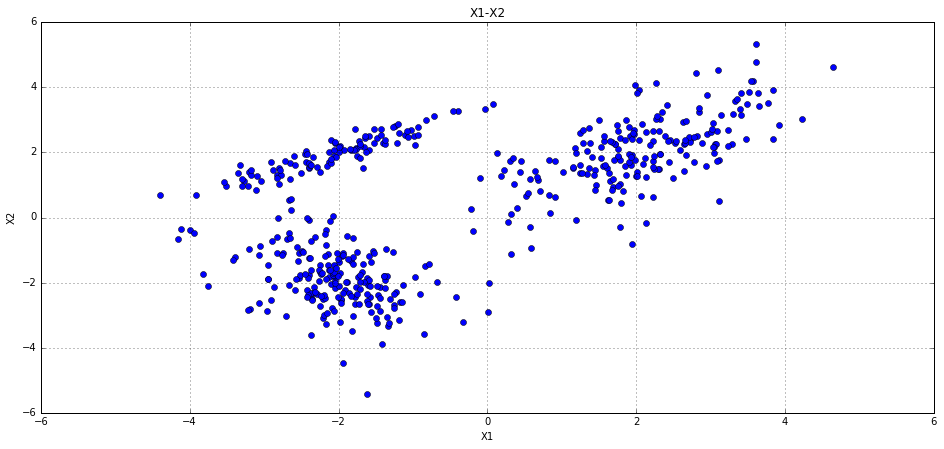

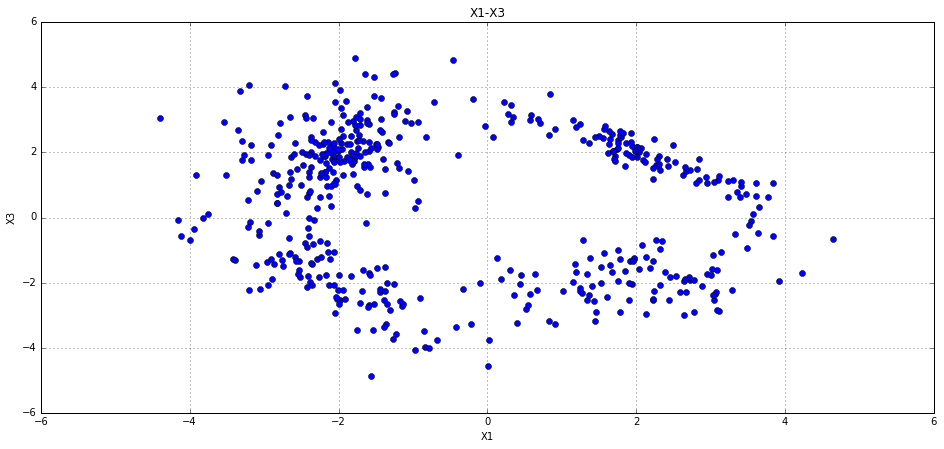

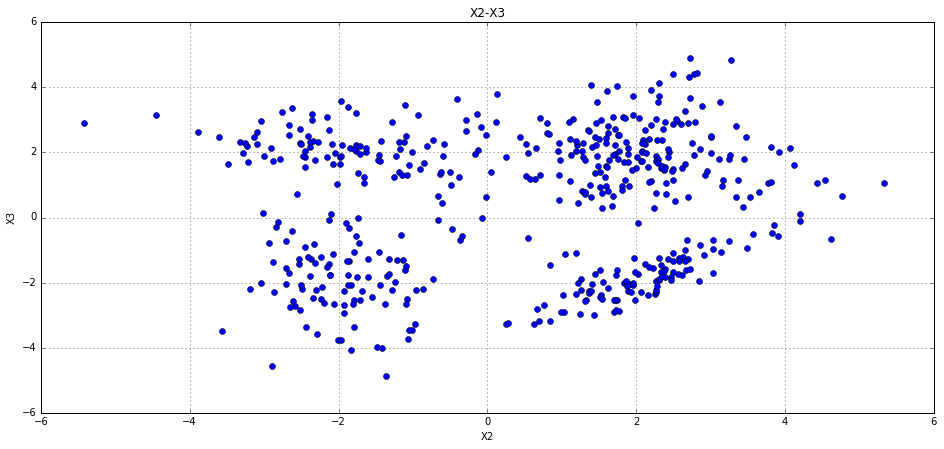

In [15]:
# 2. Построить графики X1-X2, X1-X3, X2-X3

plot_dots("X1", "X2", df_data.X1, df_data.X2)
plot_dots("X1", "X3", df_data.X1, df_data.X3)
plot_dots("X2", "X3", df_data.X2, df_data.X3)

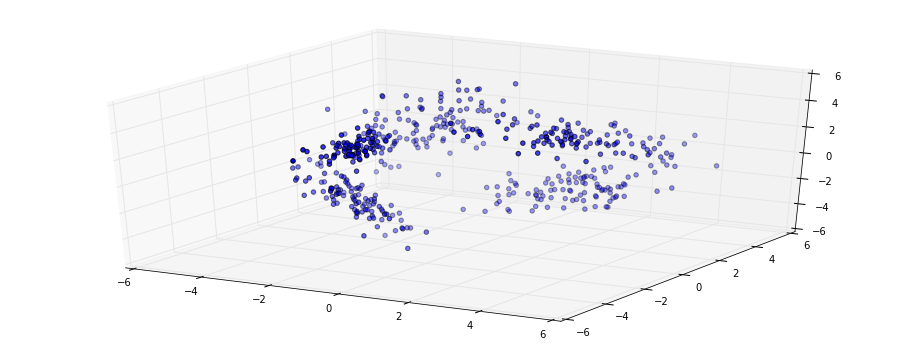

In [16]:
# 3D график
fig = plt.figure(1, figsize=[16, 6])
ax = fig.gca(projection='3d')
ax.scatter(df_data.X1, df_data.X2, df_data.X3, cmap=clrMap)

In [17]:
# Подготавливаем исхожные данные

x = list(zip(df_data.X1, df_data.X2, df_data.X3))

In [18]:
# 3. Произвести кластеризацию методом KMean и построить график NCluster-Inertia, где 
# NCluster - количество кластеров, 
# Inertia - сумма расстояний наблюдений до их ближайших центров кластеров, 
# Параметры KMean: n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20

n_clusters = range(1, 41)
inertias = []

for i in n_clusters:
    k_means = KMeans(n_clusters=i, max_iter=300, init="k-means++", random_state=0, n_init=20)
    k_means.fit(x)
    inertias.append(k_means.inertia_)

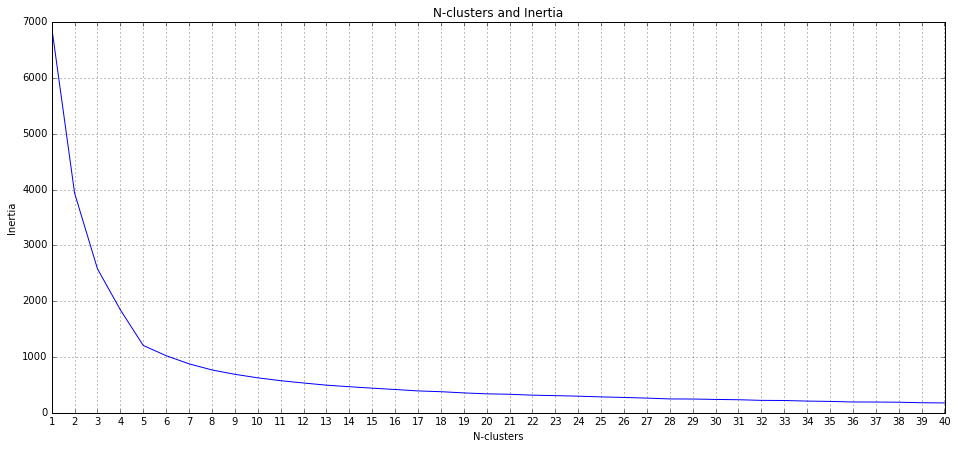

In [19]:
plt.figure(1, figsize=[16, 7])
plt.title("N-clusters and Inertia")
plt.xlabel("N-clusters")
plt.xticks(n_clusters)
plt.ylabel("Inertia")
plt.plot(n_clusters, inertias)
plt.grid(True)
plt.show()

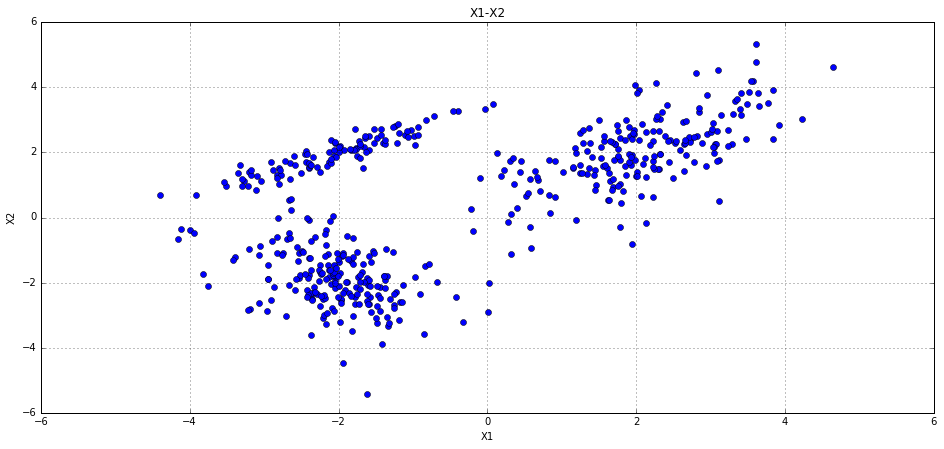

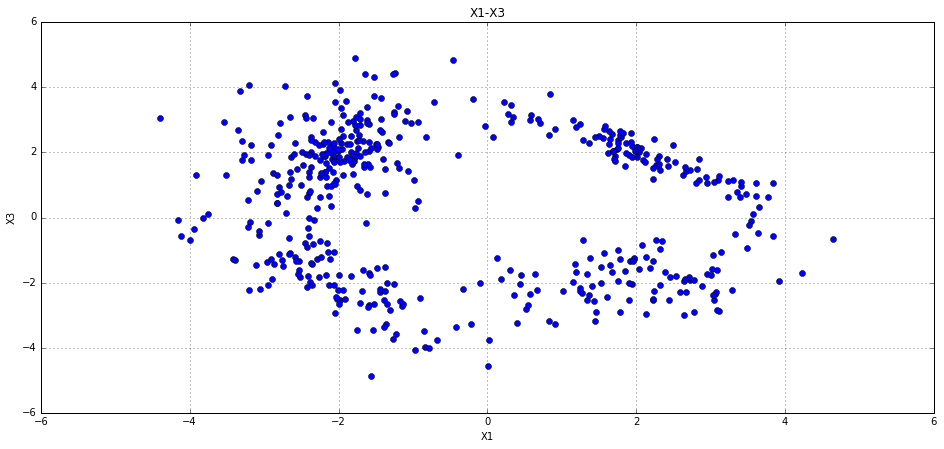

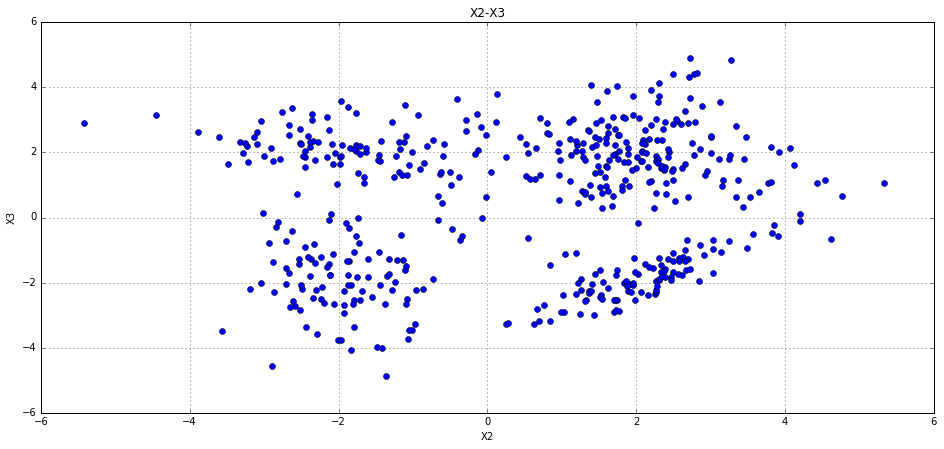

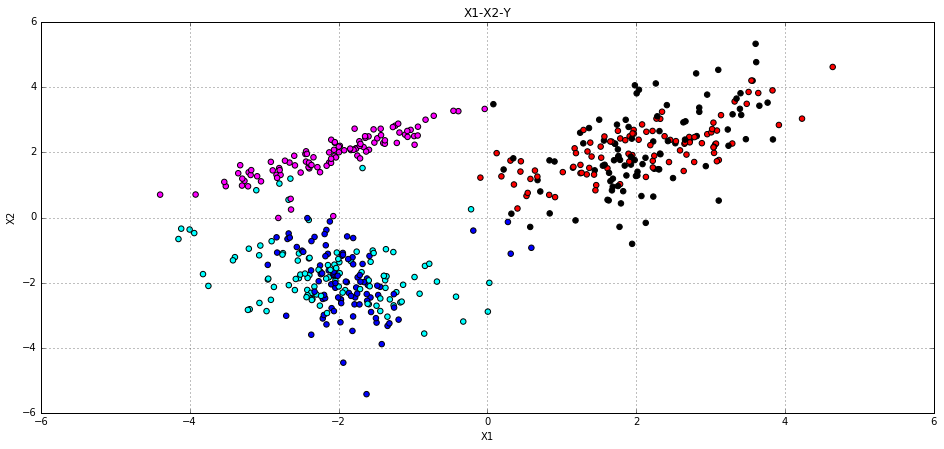

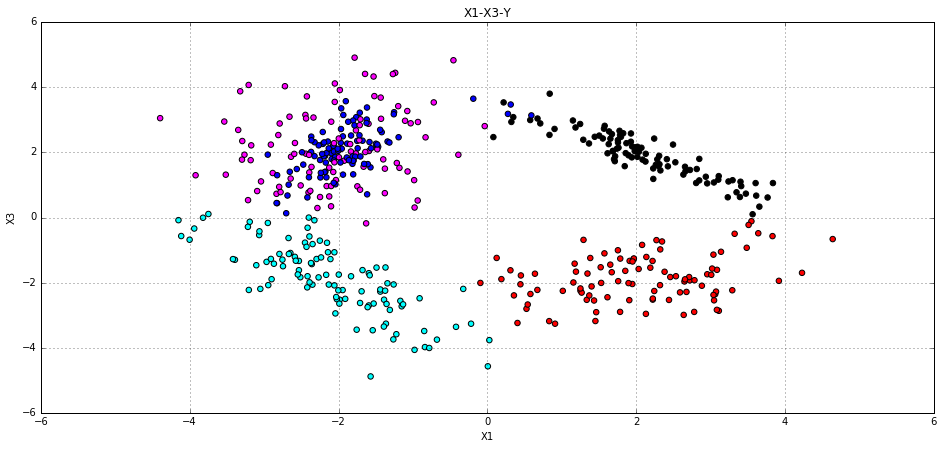

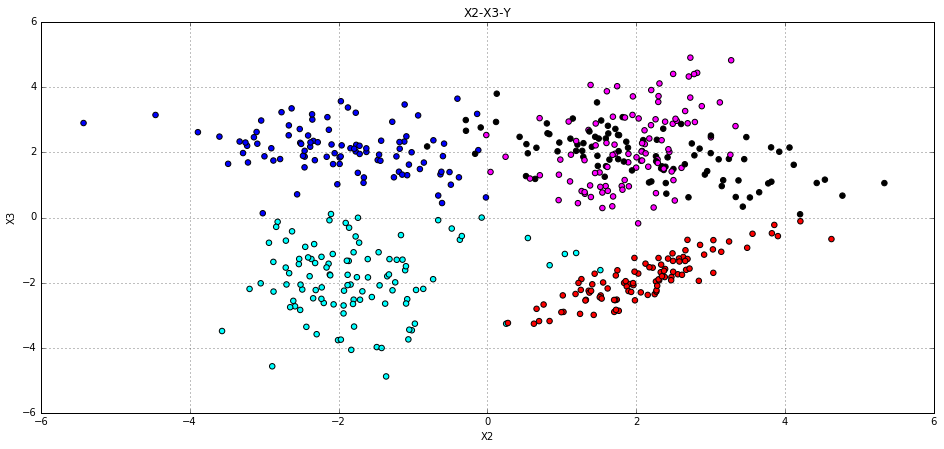

In [20]:
# 4. Выбрать подходящее количество кластеров
# Было выбрано значение 5, так как начиная с него темпы снижения инерции снижаются


k_means_chosen = KMeans(n_clusters=5, max_iter=300, init="k-means++", random_state=0, n_init=20)
k_means_chosen.fit(x)
y = k_means_chosen.predict(x)

plot_dots("X1", "X2", df_data.X1, df_data.X2)
plot_dots("X1", "X3", df_data.X1, df_data.X3)
plot_dots("X2", "X3", df_data.X2, df_data.X3)

plot_classes("X1", "X2", df_data.X1, df_data.X2, y)
plot_classes("X1", "X3", df_data.X1, df_data.X3, y)
plot_classes("X2", "X3", df_data.X2, df_data.X3, y)

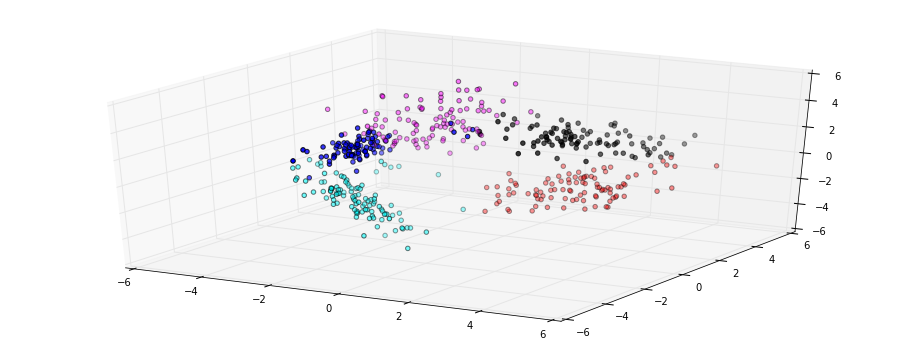

In [21]:
# 3D график с предсказанными кластерами
fig = plt.figure(1, figsize=[16, 6])
ax = fig.gca(projection='3d')
ax.scatter(df_data.X1, df_data.X2, df_data.X3, c=y, cmap=clrMap)